In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# For better visuals
plt.style.use('default')


In [7]:
df = pd.read_csv('/content/sales_data (1).csv')

# Show first rows
df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


In [9]:
# Check missing values
df.isnull().sum()

# Drop missing values (dataset already clean, but good practice)
df = df.dropna()

# Fix data types
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
# Extract month
df['Month'] = df['Date'].dt.month


In [12]:
total_sales = df['Total_Sales'].sum()
average_sales = df['Total_Sales'].mean()
best_product = df.groupby('Product')['Total_Sales'].sum().idxmax()

total_sales, average_sales, best_product


(np.int64(12365048), np.float64(123650.48), 'Laptop')

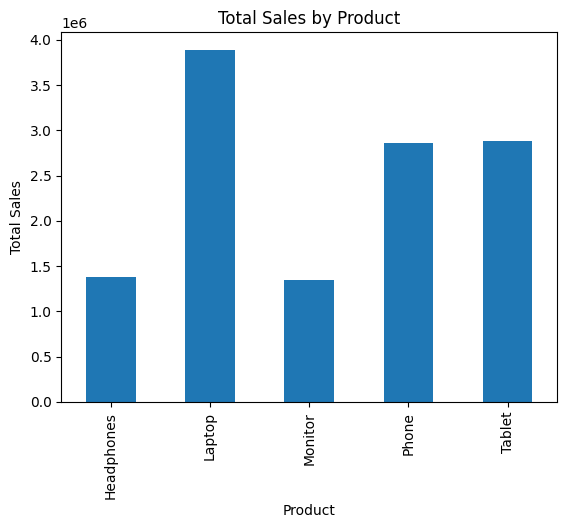

In [13]:
product_sales = df.groupby('Product')['Total_Sales'].sum()

product_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


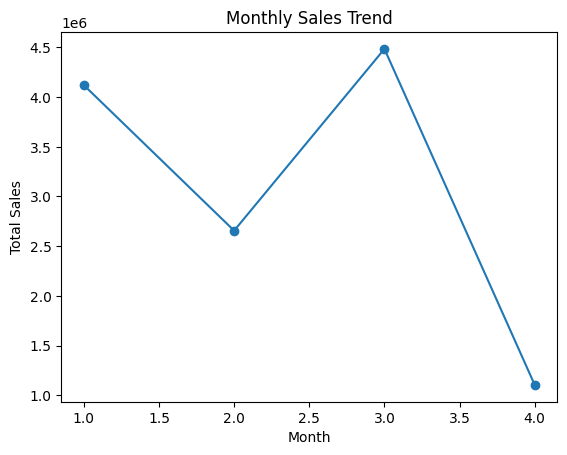

In [14]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total_Sales'].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


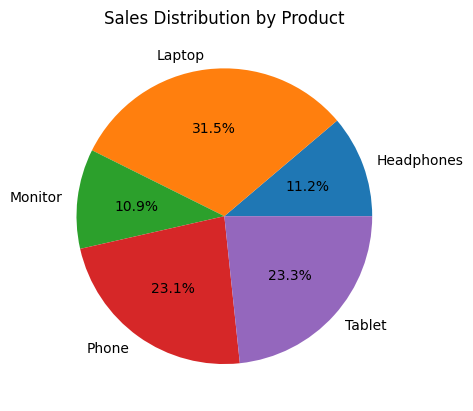

In [15]:
plt.figure()
product_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product')
plt.ylabel('')
plt.show()


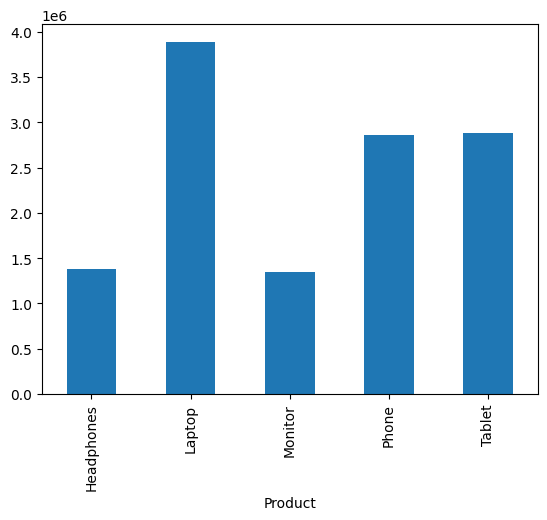

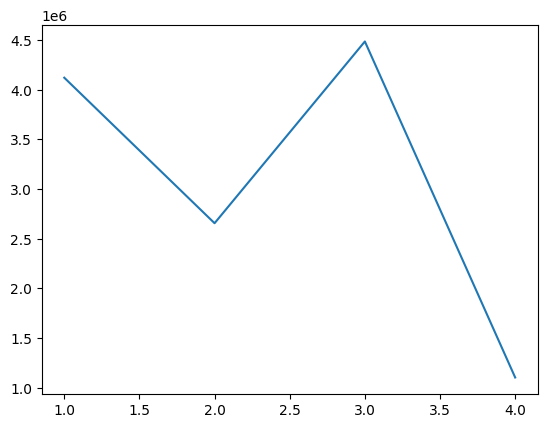

In [16]:
product_sales.plot(kind='bar')
plt.savefig('visualizations_bar.png')

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.savefig('visualizations_line.png')
